## 다양한 CNN 모델들
* [https://keras.io/api/applications/](https://keras.io/api/applications/)

In [1]:
import tensorflow as tf

### VGG Net

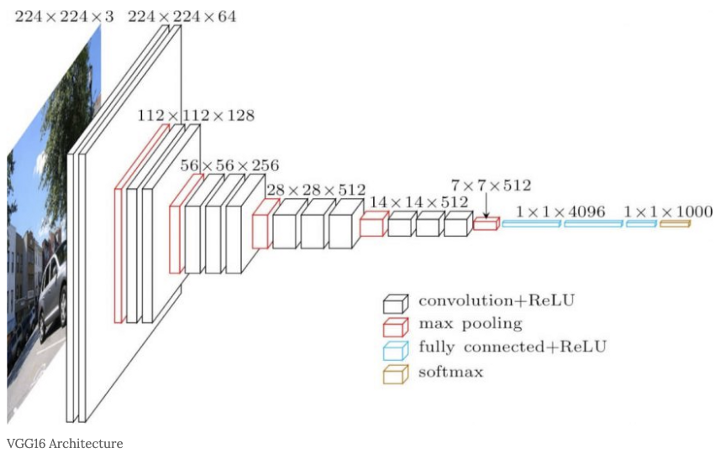

In [2]:
OriginalVGG = tf.keras.applications.VGG16(
                    include_top=True,
                    weights="imagenet", # Pre-training이 가능함.
                    input_shape=(224,224,3),
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",
                )

553467096/553467096 [==============================] - 25s 0us/step


In [3]:
OriginalVGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# VGG as feature extractor
VGGExtractor = tf.keras.applications.VGG16(
                    include_top=False,
                    weights="imagenet", # Pre-training이 가능함.
                    input_shape=(224,224,3),
                )

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
VGGExtractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
for layer in VGGExtractor.layers:
    print(layer.name, layer.trainable)

input_2 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
for layer in VGGExtractor.layers[:-4]: # 마지막 한개의 컨볼루션 블럭만 훈련하고 나머지는 얼리기
    layer.trainable = False

In [8]:
for layer in VGGExtractor.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


## 자신만의 FC Layer 정의하기

In [9]:
inp = VGGExtractor.input
x = VGGExtractor.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
out = tf.keras.layers.Dense(4, activation="softmax")(x)

model = tf.keras.Model(inp, out)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 직접 VGGNet 정의하기

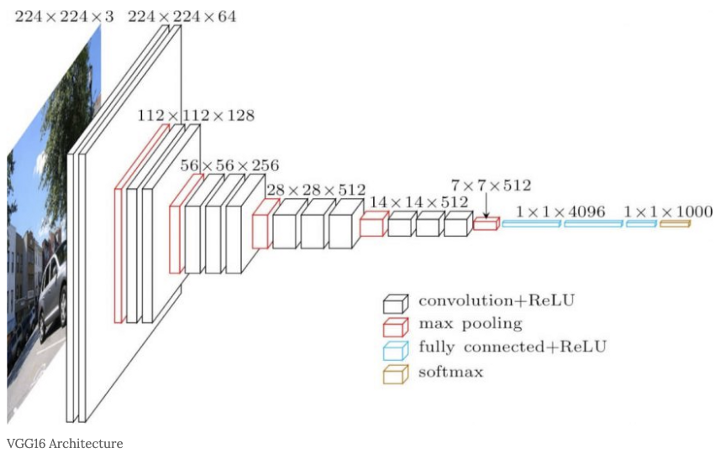

In [11]:
import tensorflow as tf
class ConvBlock1(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(ConvBlock1, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))

        self.pad = tf.keras.layers.ZeroPadding2D((1,1))
        self.maxpool = tf.keras.layers.MaxPooling2D()

    def call(self, x):
        x = self.pad(x)
        x = self.conv1(x)
        x = self.pad(x)
        x = self.conv2(x)
        x = self.maxpool(x)

        return x

class ConvBlock2(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(ConvBlock2, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))
        self.conv3 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))

        self.pad = tf.keras.layers.ZeroPadding2D((1,1))
        self.maxpool = tf.keras.layers.MaxPooling2D()

    def call(self, x):
        x = self.pad(x)
        x = self.conv1(x)
        x = self.pad(x)
        x = self.conv2(x)
        x = self.pad(x)
        x = self.conv3(x)
        x = self.maxpool(x)

        return x

In [12]:
class VGG16(tf.keras.Model):
    def __init__(self, num_classes=1000, include_top = True) -> None:
        super(VGG16, self).__init__()
        self.conv1 = ConvBlock1(64)
        self.conv2 = ConvBlock1(128)
        self.conv3 = ConvBlock2(256)
        self.conv4 = ConvBlock2(512)
        self.conv5 = ConvBlock2(512)

        self.Flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.Sequential([
                tf.keras.layers.Dense(4096, activation="relu"),
                tf.keras.layers.Dense(4096, activation="relu"),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
        ])
        self.include_top = include_top
    
    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        if self.include_top:
            x = self.Flatten(x)
            x = self.fc(x)
        return x

In [13]:
vgg16 = VGG16(num_classes=1000)
vgg16.build(input_shape=[None, 224,224,3])
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_block1 (ConvBlock1)    multiple                  38720     
                                                                 
 conv_block1_1 (ConvBlock1)  multiple                  221440    
                                                                 
 conv_block2 (ConvBlock2)    multiple                  1475328   
                                                                 
 conv_block2_1 (ConvBlock2)  multiple                  5899776   
                                                                 
 conv_block2_2 (ConvBlock2)  multiple                  7079424   
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 sequential (Sequential)     (None, 1000)              123642

In [14]:
vgg16.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# 실습과제

* 아래 그림에 나타난 아키텍처를 참고하여, VGG19을 직접 구현해보세요.
* 실습에서 진행한 [직접 VGGNet 정의하기] 부분을 참고하세요.
* model.summary() 까지 찍으시면 됩니다.

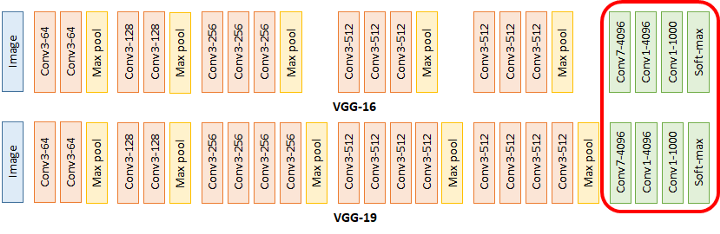

In [17]:
# Your Code Here
class ConvBlock3(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(ConvBlock3, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))
        self.conv3 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))
        self.conv4 = tf.keras.layers.Conv2D(filters, kernel_size=(3,3))

        self.pad = tf.keras.layers.ZeroPadding2D((1,1))
        self.maxpool = tf.keras.layers.MaxPooling2D()

    def call(self, x):
        x = self.pad(x)
        x = self.conv1(x)
        x = self.pad(x)
        x = self.conv2(x)
        x = self.pad(x)
        x = self.conv3(x)
        x = self.pad(x)
        x = self.conv4(x)
        x = self.maxpool(x)

        return x

class VGG19(tf.keras.Model):
    def __init__(self, num_classes=1000, include_top = True) -> None:
        super(VGG19, self).__init__()
        self.conv1 = ConvBlock1(64)
        self.conv2 = ConvBlock1(128)
        self.conv3 = ConvBlock3(256)
        self.conv4 = ConvBlock3(512)
        self.conv5 = ConvBlock3(512)

        self.Flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.Sequential([
                tf.keras.layers.Dense(4096, activation="relu"),
                tf.keras.layers.Dense(4096, activation="relu"),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
        ])
        self.include_top = include_top
    
    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        if self.include_top:
            x = self.Flatten(x)
            x = self.fc(x)
        return x

vgg19 = VGG19(num_classes=1000)
vgg19.build(input_shape=[None, 224,224,3])
vgg19.summary()

Model: "vgg19_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_block1_4 (ConvBlock1)  multiple                  38720     
                                                                 
 conv_block1_5 (ConvBlock1)  multiple                  221440    
                                                                 
 conv_block3 (ConvBlock3)    multiple                  2065408   
                                                                 
 conv_block3_1 (ConvBlock3)  multiple                  8259584   
                                                                 
 conv_block3_2 (ConvBlock3)  multiple                  9439232   
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 sequential_1 (Sequential)   (None, 1000)              1236